In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
import os 

In [3]:


cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=2017)
tree=DecisionTreeClassifier(random_state=0)
###Decision trees in scikit-learn are implemented in the DecisionTreeRegressor 
##and DecisionTreeClassifier classes. Scikit-learn only implements pre-pruning, not post- pruning.
tree.fit(X_train,y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print('\n'"accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000

accuracy on test set: 0.916084


In [4]:
###accuracy on training set: 1.000000###
 
###accuracy on test set: 0.916084###
 
###apply pre-pruning to the tree, which will stop developing the tree before we
### perfectly fit to the training data.
tree01=DecisionTreeClassifier(max_depth=4,random_state=0)
tree01.fit(X_train,y_train)
print('\n'"accuracy on training set 01: %f" % tree01.score(X_train, y_train))
print('\n'"accuracy on test set 01: %f" % tree01.score(X_test, y_test))
 
###accuracy on training set 01: 0.990610###
 
###accuracy on test set 01: 0.937063###
 
 



accuracy on training set 01: 0.990610

accuracy on test set 01: 0.937063


In [5]:
###visualize and analyze the tree model###
###build a file to visualize 
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="mytree.dot",class_names=['malignant',"benign"],
    feature_names=cancer.feature_names,impurity=False,filled=True)
###visualize the .dot file. Need to install graphviz seperately at first 
import graphviz
with open("mytree.dot") as f:
    dot_graph=f.read()


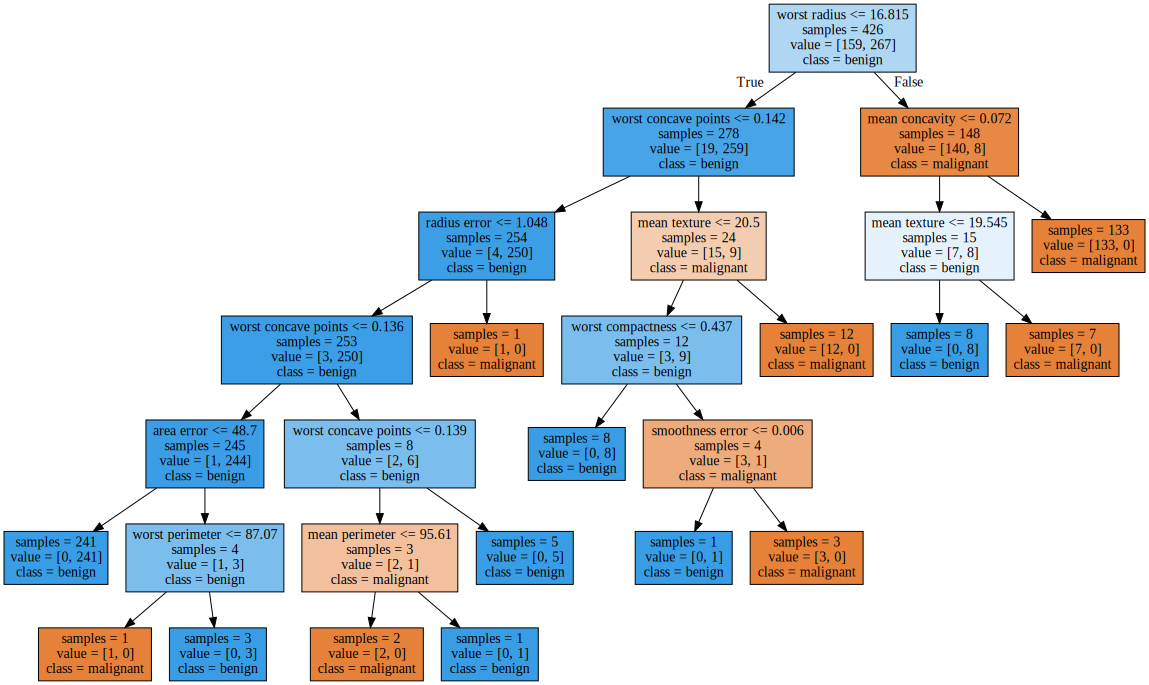

In [10]:
os.environ["PATH"] += os.pathsep + 'C:/Users/percy/AppData/Local/conda/conda/envs/tensorflow/Library/bin/graphviz'
graphviz.Source(dot_graph)